In [1]:
import os
import json
import time
from datetime import datetime, timezone
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import sys
sys.path.append(os.path.expanduser("./../plot_results"))

from datalakes import download_data_from_datalakes_dataset
from alplakes import download_3d_timeserie_from_api, parse_alplakes_json_3d_timeserie_to_df, download_1d_depthtime_from_api
from utils import save_json, try_download

## Download Alplakes 1D

In [2]:
lake_name = "geneva"
year_to_download = 2024

In [4]:
for i in range (1,13):
    try:
        start_download_alplakes = f'{year_to_download}{str(i).zfill(2)}010000'
        end_download_alplakes = f'{year_to_download}{str(i+1).zfill(2)}010000'
        alplakes_1d_json_timeserie_directory = rf".\alplakes_1d\{lake_name}"
        alplakes_1d_json = download_1d_depthtime_from_api(lake_name,
                                                      start_download_alplakes,
                                                      end_download_alplakes
                                                      )
        alplakes_1d_download_file_path = os.path.join(alplakes_1d_json_timeserie_directory, f'{start_download_alplakes}.json')
        save_json(alplakes_1d_json, alplakes_1d_download_file_path)
        
        print(f'Month {i} saved in {alplakes_1d_download_file_path}.')
    except:
        print(f"Ouups, didn't work for month {i}")
        continue

Month 1 saved in .\alplakes_1d\geneva\202201010000.json.
Month 2 saved in .\alplakes_1d\geneva\202202010000.json.
Month 3 saved in .\alplakes_1d\geneva\202203010000.json.
Month 4 saved in .\alplakes_1d\geneva\202204010000.json.
Month 5 saved in .\alplakes_1d\geneva\202205010000.json.
Month 6 saved in .\alplakes_1d\geneva\202206010000.json.
Month 7 saved in .\alplakes_1d\geneva\202207010000.json.
Month 8 saved in .\alplakes_1d\geneva\202208010000.json.
Month 9 saved in .\alplakes_1d\geneva\202209010000.json.
Month 10 saved in .\alplakes_1d\geneva\202210010000.json.
Month 11 saved in .\alplakes_1d\geneva\202211010000.json.
Ouups, didn't work for month 12


## Download 3D Alplakes simulation

### Timeserie

In [3]:
lake_name = "geneva"
sta_name = 'geneva_lexplore'
depth= 30 # positive sign
year_to_download = 2022

In [4]:
with open(os.path.join('../config_points.json'), 'r') as file:
    config_points = json.load(file)[sta_name]

lat_station_wgs84 = config_points['lat_station_wgs84']
long_station_wgs84 = config_points['long_station_wgs84']

In [5]:
for i in range (1,13):
    try:
        start_download_alplakes = f'{year_to_download}{str(i).zfill(2)}010000'
        end_download_alplakes = f'{year_to_download}{str(i+1).zfill(2)}010000'
        alplakes_json_timeserie_directory = rf".\alplakes_3d\{sta_name}\timeseries_{depth}m"
        
        
        download_alplakes_from_api:bool = True
        save_timeserie_alplakes:bool = True
        # -------------------------------------
        start_clock = time.time()
        if download_alplakes_from_api:    
            alplakes_json = download_3d_timeserie_from_api(lake_name,
                                                      start_download_alplakes,
                                                      end_download_alplakes,
                                                      depth,
                                                      lat_station_wgs84,
                                                      long_station_wgs84
                                                      )
            alplakes_timeserie = parse_alplakes_json_3d_timeserie_to_df(alplakes_json)
            
            if save_timeserie_alplakes:
                alplakes_download_file_path = os.path.join(alplakes_json_timeserie_directory, f'{start_download_alplakes}.json')
                print(f'Saving {alplakes_download_file_path}...')
                save_json(alplakes_json, alplakes_download_file_path)
        
        end_clock = time.time()
        print(f'Month {i} done. Operation took {end_clock - start_clock}s.')
    except:
        print(f"Ouups, didn't work for month {i}")
        continue

Saving .\alplakes_3d\geneva_lexplore\timeseries_30m\202201010000.json...
Month 1 done. Operation took 15.908562660217285s.
Saving .\alplakes_3d\geneva_lexplore\timeseries_30m\202202010000.json...
Month 2 done. Operation took 14.427785634994507s.
Saving .\alplakes_3d\geneva_lexplore\timeseries_30m\202203010000.json...
Month 3 done. Operation took 15.672079801559448s.
Saving .\alplakes_3d\geneva_lexplore\timeseries_30m\202204010000.json...
Month 4 done. Operation took 15.374430418014526s.
Saving .\alplakes_3d\geneva_lexplore\timeseries_30m\202205010000.json...
Month 5 done. Operation took 15.490871906280518s.
Ouups, didn't work for month 6
Saving .\alplakes_3d\geneva_lexplore\timeseries_30m\202207010000.json...
Month 7 done. Operation took 17.28231906890869s.
Ouups, didn't work for month 8
Saving .\alplakes_3d\geneva_lexplore\timeseries_30m\202209010000.json...
Month 9 done. Operation took 18.17866039276123s.
Saving .\alplakes_3d\geneva_lexplore\timeseries_30m\202210010000.json...
Month 

## Download Datalakes

### Known dataset type

Includes LéXPLORE Thermochain and Idronaut

In [3]:
import os
import shutil
import json
import time
from datetime import datetime, timezone
import matplotlib.pyplot as plt
import numpy as np

import sys
sys.path.append(os.path.expanduser("./../plot_results"))

from datalakes import download_data_from_datalakes_dataset
from utils import save_json, try_download

In [5]:
year = 2024

In [4]:
sta_name = 'lexplore'
dataset_name = 'thermochain'
with open(r"./datalakes_meas/datasets.json", 'r') as file:
    dataset_config = json.load(file)[sta_name][dataset_name]

In [6]:
start_clock = time.time()

temp_folder = "./temp"
shutil.rmtree(temp_folder)
datasets, xr_measure = download_data_from_datalakes_dataset(dataset_config['id'], 
                                                            datetime(year, 1, 1, 0, 0, 0, tzinfo=timezone.utc), 
                                                            datetime(year+1, 1, 1, 0, 0, 0, tzinfo=timezone.utc), dataset_type=dataset_config['type'], datatype=dataset_config['filetype'])

end_clock = time.time()
print(f'Done. Operation took {end_clock - start_clock}s.')

Done. Operation took 54.54821443557739s.


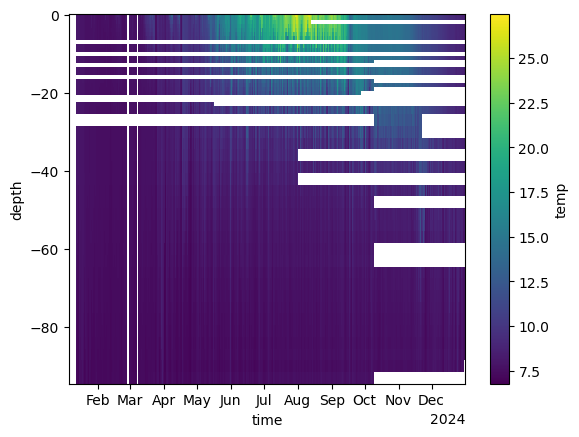

In [7]:
xr_measure.sel(time=slice(np.datetime64(f'{year}-01-01'), np.datetime64(f'{year+1}-01-01')))['temp'].plot()

In [8]:
xr_measure.sel(time=slice(np.datetime64(f'{year}-01-01'), np.datetime64(f'{year+1}-01-01'))).to_netcdf(f'./datalakes_meas/{lake_name}/{dataset_name}/{year}.nc')

### Unknow Dataset type 

First have to figure out how to parse it

In [11]:
dataset_id = 600
response = try_download(f'https://api.datalakes-eawag.ch/files?datasets_id={dataset_id}')
files_properties = response.json()

In [12]:
response.json()

[{'id': 1396488,
  'datasets_id': 600,
  'filelink': 'files/600/1396488.json',
  'filetype': 'json',
  'filelineage': 1394843,
  'mindatetime': '2023-09-13T09:36:29.000Z',
  'maxdatetime': '2023-09-18T00:16:29.000Z',
  'mindepth': '-2.0600000000000005',
  'maxdepth': '7.69',
  'latitude': '-9999',
  'longitude': '-9999',
  'connect': 'join',
  'parameters_connectid': 1},
 {'id': 1550464,
  'datasets_id': 600,
  'filelink': 'git/128/acousticdopplercurrentprofiler/data/Level2/RDI600/L2_20240508_075533.nc',
  'filetype': 'nc',
  'filelineage': None,
  'mindatetime': None,
  'maxdatetime': None,
  'mindepth': None,
  'maxdepth': None,
  'latitude': None,
  'longitude': None,
  'connect': None,
  'parameters_connectid': None},
 {'id': 1423182,
  'datasets_id': 600,
  'filelink': 'git/128/acousticdopplercurrentprofiler/data/Level2/RDI600/L2_20231019_120256.nc',
  'filetype': 'nc',
  'filelineage': None,
  'mindatetime': None,
  'maxdatetime': None,
  'mindepth': None,
  'maxdepth': None,
  '

In [13]:
def get_ids_files_filtered_by_datatype(files_properties: json, datatype: str) -> list[int]:
    file_ids = []
    for file in files_properties:
        if file['filetype'] == datatype:
            file_ids.append(file['id'])

    if len(file_ids) == 0:
        raise FileNotFoundError(f"No data of type {datatype} found in {files_properties}")

    return file_ids

### json files

In [14]:
filtered_ids = get_ids_files_filtered_by_datatype(response.json(), 'json')

In [15]:
test_file_id = filtered_ids[-3]
response = try_download(f'https://api.datalakes-eawag.ch/download/{test_file_id}')

In [16]:
json_meas = response.json()

In [17]:
json_meas.keys()

dict_keys(['x', 'y', 'z', 'z1', 'z2', 'y1', 'y2', 'y3', 'y5', 'z3', 'z4', 'y6', 'z5', 'y4'])

In [18]:
np.array(json_meas['x']).shape

(85,)

In [19]:
np.array(json_meas['x'], dtype='datetime64[s]').astype('datetime64[ns]')

array(['2023-10-18T10:12:50.000000000', '2023-10-18T10:22:50.000000000',
       '2023-10-18T10:32:50.000000000', '2023-10-18T10:42:50.000000000',
       '2023-10-18T10:52:50.000000000', '2023-10-18T11:02:50.000000000',
       '2023-10-18T11:12:50.000000000', '2023-10-18T11:22:50.000000000',
       '2023-10-18T11:32:50.000000000', '2023-10-18T11:42:50.000000000',
       '2023-10-18T11:52:50.000000000', '2023-10-18T12:02:50.000000000',
       '2023-10-18T12:12:50.000000000', '2023-10-18T12:22:50.000000000',
       '2023-10-18T12:32:50.000000000', '2023-10-18T12:42:50.000000000',
       '2023-10-18T12:52:50.000000000', '2023-10-18T13:02:50.000000000',
       '2023-10-18T13:12:50.000000000', '2023-10-18T13:22:50.000000000',
       '2023-10-18T13:32:50.000000000', '2023-10-18T13:42:50.000000000',
       '2023-10-18T13:52:50.000000000', '2023-10-18T14:02:50.000000000',
       '2023-10-18T14:12:50.000000000', '2023-10-18T14:22:50.000000000',
       '2023-10-18T14:32:50.000000000', '2023-10-18

In [20]:
np.array(json_meas['y'])

array([ 7.69,  7.44,  7.19,  6.94,  6.69,  6.44,  6.19,  5.94,  5.69,
        5.44,  5.19,  4.94,  4.69,  4.44,  4.19,  3.94,  3.69,  3.44,
        3.19,  2.94,  2.69,  2.44,  2.19,  1.94,  1.69,  1.44,  1.19,
        0.94,  0.69,  0.44,  0.19, -0.06, -0.31, -0.56, -0.81, -1.06,
       -1.31, -1.56, -1.81, -2.06])

### netcdf files

In [7]:
import io
import xarray as xr
import os

with open("./temp/data_1375276.nc", "wb") as file:
    file.write(response.content)

xr_ds = xr.open_dataset("./temp/data_1375276.nc", engine="netcdf4")

In [4]:
xr_ds = xr.open_dataset("./temp/data_1375276.nc", engine="netcdf4")

In [22]:
xr_ds

<xarray.Dataset> Size: 6MB
Dimensions:    (time: 706, depth: 110)
Coordinates:
  * time       (time) datetime64[ns] 6kB 2020-07-24T14:41:40 ... 2020-07-29T1...
  * depth      (depth) float64 880B 11.11 12.11 13.11 ... 118.1 119.1 120.1
Data variables: (12/17)
    u          (depth, time) float64 621kB ...
    v          (depth, time) float64 621kB ...
    temp       (time) float64 6kB ...
    echo1      (depth, time) float64 621kB ...
    echo2      (depth, time) float64 621kB ...
    echo3      (depth, time) float64 621kB ...
    ...         ...
    time_qual  (time) float64 6kB ...
    u_qual     (depth, time) float64 621kB ...
    v_qual     (depth, time) float64 621kB ...
    mU         (time) float64 6kB ...
    mdir       (time) float64 6kB ...
    Sv         (depth, time) float64 621kB ...
Attributes: (12/16)
    institution:       EPFL
    source:            ADCP
    references:        LéXPLORE commun instruments camille.minaudo@epfl.ch>
    history:           See history on Renku
    conventions:       CF 1.7
    comment:           Data from ADCP on Lexplore Platform in Lake Geneva
    ...                ...
    up:                False
    bottom_depth:      110
    transducer_depth:  8
    beam_angle:        20.0
    xmit_length:       0.96
    beam_freq:         300.0

In [ ]:
plt.plot(json_data['x'])

In [9]:
# Step 1: Define path to the folder containing NetCDF files
folder_path = r'C:\Users\leroquan\Downloads\lexploremeteostation_datalakesdownload'

# Step 2: Get list of .nc files
file_list = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.nc')]

# Step 3: Open and merge the datasets
ds_merged = xr.open_mfdataset(file_list, combine='by_coords')  # 'nested' is another option

# Now ds_merged contains all your NetCDF data in one xarray.Dataset


In [11]:
ds_merged.to_netcdf(r'./meteo/geneva/Lexplore_2023.nc')

# Random unformatted data

In [ ]:
station_name = 'tiefenbrunnen'

In [27]:
file_path = rf"C:\Users\leroquan\Documents\Data\measures\zurich\{station_name}.json"

In [32]:
rows = []
date_start = datetime(2024,1,1)
date_end = datetime(2025,5,1)

current_date = date_start
header = None

In [33]:
from datetime import datetime, timedelta
import csv

In [34]:
while current_date < date_end:
    next_date = current_date + timedelta(days=1)
    url = f'https://tecdottir.metaodi.ch/measurements/{station_name}?startDate={current_date.date()}&endDate={next_date.date()}&sort=timestamp_cet%20desc&limit=500&offset=0'
    
    response = try_download(url)
    data = response.json()
    
    if not data['result']:
        current_date = next_date
        continue
    
    if header is None:
        measurement_keys = list(data['result'][0]['values'].keys())
        header = ['station', 'timestamp'] + measurement_keys

    for record in data['result']:
        row = {
            'station': record['station'],
            'timestamp': record['timestamp']
        }
        for key in measurement_keys:
            row[key] = record['values'].get(key, {}).get('value', None)
        rows.append(row)

    current_date = next_date

In [35]:
with open(rf'C:\Users\leroquan\Documents\Data\measures\zurich\{station_name}_data.csv', 'w', newline='', encoding='utf-8') as f:
    writer = csv.DictWriter(f, fieldnames=header)
    writer.writeheader()
    writer.writerows(rows)

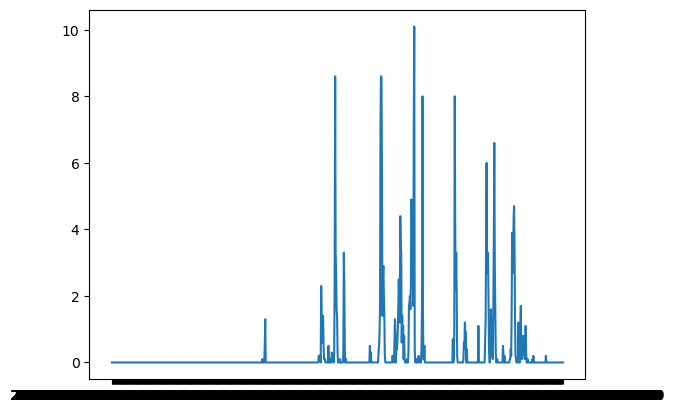

In [20]:
plt.plot(data['time'], data['variables']['precipitation']['data'])

In [7]:
from datetime import timedelta, datetime
import xarray as xr
import pandas as pd
from utils import try_download

In [20]:
date_start = datetime(2023,1,1)
date_end = datetime(2024,1,1)

current_date = date_start
datasets = []

In [26]:
while current_date < date_end:
    url = f'https://alplakes-internal-api.eawag.ch/meteoswiss/cosmo/point/reanalysis/VNXQ34/{current_date.strftime("%Y%m%d")}/{current_date.strftime("%Y%m%d")}/46.5/6.67?variables=T_2M&variables=U&variables=V&variables=GLOB&variables=RELHUM_2M&variables=PMSL&variables=CLCT'
    
    response = try_download(url)
    data = response.json()
    
    time = pd.to_datetime(data["time"])
    
    df_dict = {
        "U": data['variables']['U']['data'],
        "V": data['variables']['V']['data'],
        "GLOB": data['variables']['GLOB']['data'],
        "RELHUM_2M": data['variables']['RELHUM_2M']['data'],
        "PMSL": data['variables']['PMSL']['data'],
        "CLCT": data['variables']['CLCT']['data'],
    }
    
    df = pd.DataFrame(df_dict, index=time)
    df.index.name = "time"
    ds = df.to_xarray()
    
    datasets.append(ds)
    current_date += timedelta(days=1)
    
combined = xr.merge(datasets)
combined = combined.sortby("time")

In [27]:
combined.time

<xarray.DataArray 'time' (time: 8760)> Size: 70kB
array([1672531200000000000, 1672534800000000000, 1672538400000000000, ...,
       1704056400000000000, 1704060000000000000, 1704063600000000000],
      shape=(8760,), dtype=object)
Coordinates:
  * time     (time) object 70kB 1672531200000000000 ... 1704063600000000000

In [28]:
combined.to_netcdf("./meteo/geneva/cosmo_lexplore_2023.nc")

In [77]:
xr.open_dataset("./meteo/geneva/cosmo_lexplore_2024.nc")

<xarray.Dataset> Size: 286kB
Dimensions:    (time: 5112)
Coordinates:
  * time       (time) int64 41kB 1704067200000000000 ... 1722466800000000000
Data variables:
    U          (time) float64 41kB ...
    V          (time) float64 41kB ...
    GLOB       (time) float64 41kB ...
    RELHUM_2M  (time) float64 41kB ...
    PMSL       (time) float64 41kB ...
    CLCT       (time) float64 41kB ...